In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import sklearn.feature_extraction.text as sk_text 
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE

In [2]:
dataset = pd.read_csv("../drugsCom_raw/cleaned_data.csv")
dataset["review"] = dataset["review"].str.replace('\\r\\n',' ',regex=True)

In [3]:
def TFIDF(df_train,df_test,min_gram,max_gram,num_features=1200):
    vectorizer = sk_text.TfidfVectorizer(stop_words='english',ngram_range=(min_gram,max_gram),max_features=num_features,min_df=2)
    print(vectorizer)
    train_data_features = vectorizer.fit_transform(df_train["review"])
    test_data_features = vectorizer.transform(df_test["review"])
    return train_data_features, test_data_features


In [4]:
dataset.dropna(how="any",axis=0,inplace=True)
dataset.drop(["Id","drugName","condition","rating","date","usefulCount"],axis=1,inplace=True)
dataset_label = dataset["outcome"]
dataset.drop(["outcome"],axis=1,inplace=True)
label =["Positive","Negative"]
classify = lambda x: 1 if x =="Positive" else 0
df = dataset_label.map(classify)

In [5]:

X_train,X_test,y_train,y_test = train_test_split(dataset,df,test_size=0.15,random_state=42)

In [6]:
X_train_review, X_test_review = TFIDF(X_train,X_test,min_gram=1,max_gram=1,num_features=1200)
X_train_review = X_train_review.toarray()
X_test_review = X_test_review.toarray()
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(categories=[list(range(0,851))])
train_onehotlabels_condition = enc.fit_transform(X_train[["condition_label"]].to_numpy()).toarray()
test_onehotlabels_condition = enc.fit_transform(X_test[["condition_label"]].to_numpy()).toarray()

train_usefulcount = np.array([X_train["usefulCount_minmax"].to_numpy()]).T
test_usefulcount = np.array([X_test["usefulCount_minmax"].to_numpy()]).T
X_train_final = np.concatenate((X_train_review,train_onehotlabels_condition,train_usefulcount), axis=1)
X_test_final = np.concatenate((X_test_review,test_onehotlabels_condition,test_usefulcount),axis = 1)

TfidfVectorizer(max_features=1200, min_df=2, stop_words='english')


In [ ]:
X_train_final

In [8]:
print(X_train_final.shape)
print(y_train.shape)

(181786, 2052)
(181786,)


In [16]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Before SMOTE')

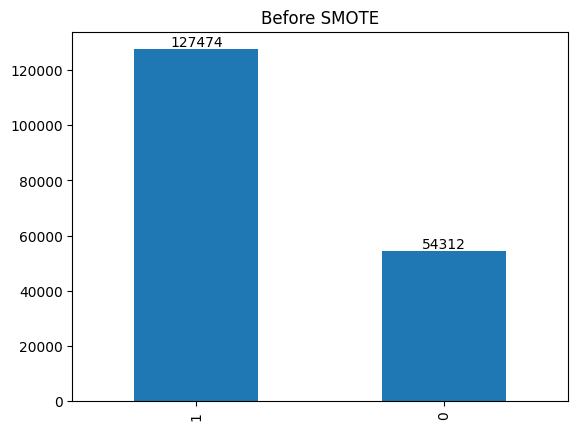

In [17]:
ax = y_train.value_counts().plot.bar()
ax.bar_label(ax.containers[0])
plt.title("Before SMOTE")

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_new = pca.fit_transform(X_train_final)

In [24]:
x_new

array([[ 0.83269209,  0.02368116],
       [-0.19678248, -0.08286529],
       [-0.17322583, -0.05489377],
       ...,
       [-0.15574639, -0.05217511],
       [-0.17886853, -0.05176237],
       [-0.11225691, -0.05944437]])

In [29]:
x_new[:,0]

array([ 0.83269209, -0.19678248, -0.17322583, ..., -0.15574639,
       -0.17886853, -0.11225691])

In [ ]:
plt.scatter(x_new[:,0],x_new[:,1])

In [ ]:
plt

In [31]:
sm = SMOTE(sampling_strategy=0.6,random_state=42)
X_res, y_res = sm.fit_resample(X_train_final,y_train)

Text(0.5, 1.0, 'After SMOTE')

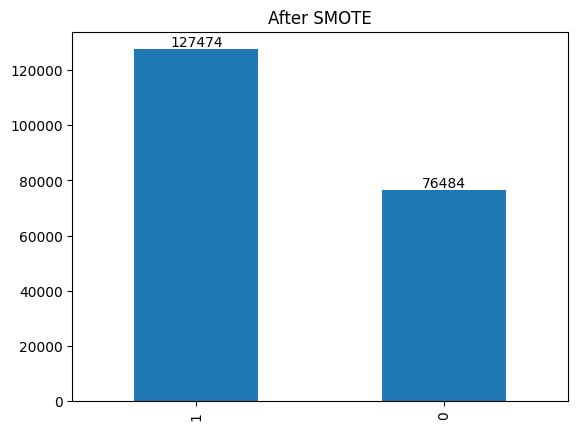

In [32]:
ax= y_res.value_counts().plot.bar()
ax.bar_label(ax.containers[0])
plt.title("After SMOTE")

In [10]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train_final,y_train)

LogisticRegression(max_iter=500)

In [12]:
pred = log_model.predict(X_test_final)

print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69      9594
           1       0.85      0.91      0.88     22487

    accuracy                           0.83     32081
   macro avg       0.80      0.77      0.79     32081
weighted avg       0.82      0.83      0.82     32081



In [4]:
from sklearn.svm import SVC
model_svc = SVC(max_iter=100)
model_svc.fit(X_train_final,y_train)

NameError: name 'X_train_final' is not defined

In [3]:
pred = model_svc.predict(X_test_final)

print(metrics.classification_report(y_test,pred))

NameError: name 'model_svc' is not defined